# Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [37]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import fetch_california_housing

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the California Housing dataset

housing = fetch_california_housing()

In [3]:
# Convert the dataset into a pandas DataFrame 

df=pd.DataFrame(housing.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.columns

RangeIndex(start=0, stop=8, step=1)

In [8]:
# Assign meaningful column names to the DataFrame

df.columns=housing.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# Add the target variable (PRICE) to the DataFrame

df['PRICE']=housing.target

In [10]:
# Now, the dataset includes both features (independent variables) and the target (dependent variable) 

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
#EDA

In [12]:
df.shape

(20640, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [14]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [16]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [17]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
corr = df.corr()  # Compute the correlation matrix for all numerical columns
corr.shape  # Get the dimensions of the correlation matrix

(9, 9)

<AxesSubplot:>

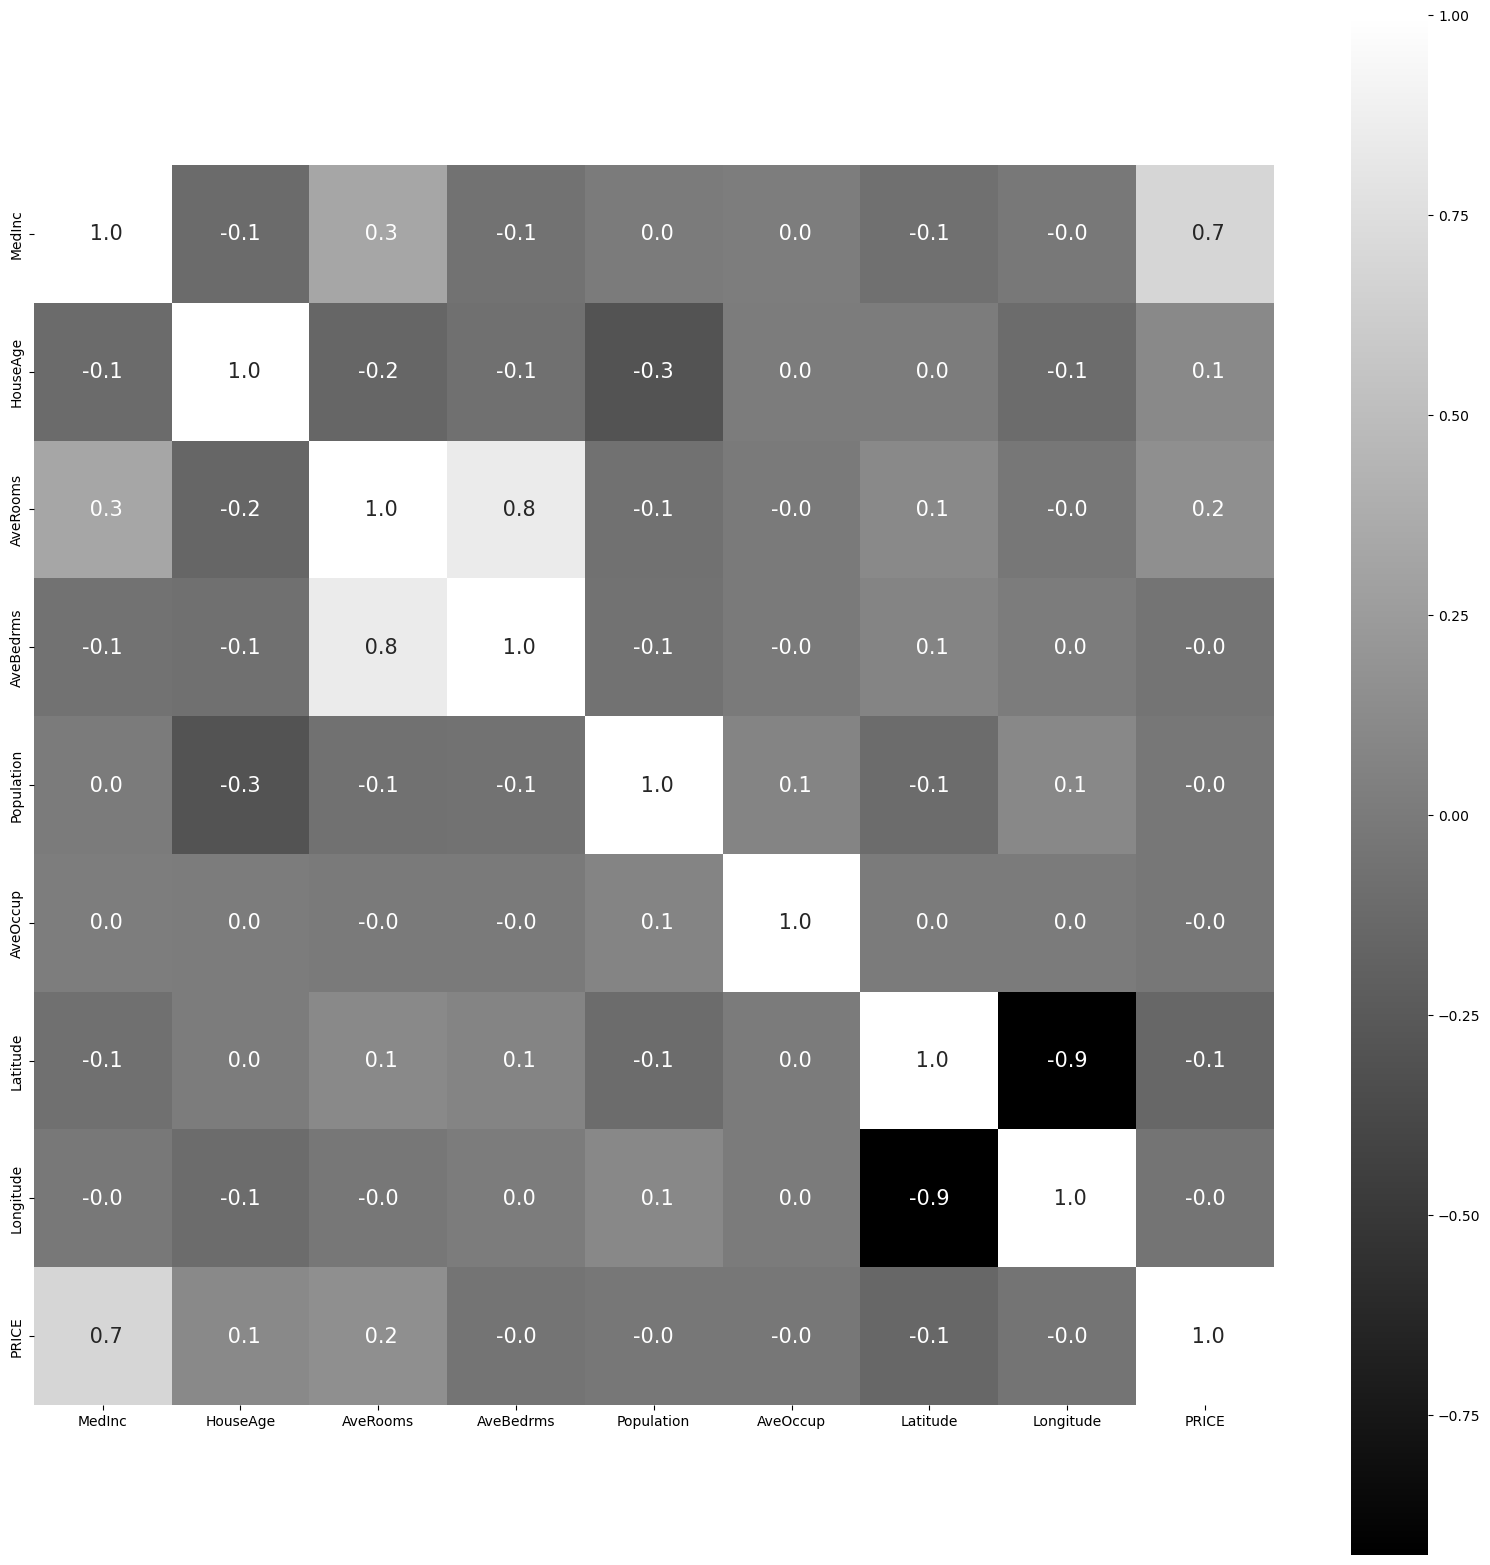

In [26]:
# Plot correlation heatmap with annotations

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, fmt=' .1f', annot=True, annot_kws={'size':15}, cmap='gray') 

In [27]:
# Defining Features (X) and Target (y)

X=df.drop(['PRICE'], axis=1)
y=df['PRICE']

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=4)

# Split data into training (70%) and testing (30%) sets with a fixed random state for reproducibility

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Build the model (Deep Neural Network mimicking Linear Regression)
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(1, activation='linear')       # Only one Dense layer (linear regression)
])

In [31]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [32]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4288 - mae: 2.0186 - val_loss: 3.8587 - val_mae: 1.7218
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7330 - mae: 1.6730 - val_loss: 2.7192 - val_mae: 1.4130
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6277 - mae: 1.3663 - val_loss: 1.9393 - val_mae: 1.1397
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9433 - mae: 1.1035 - val_loss: 1.3989 - val_mae: 0.9112
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4169 - mae: 0.8845 - val_loss: 1.0370 - val_mae: 0.7408
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0551 - mae: 0.7160 - val_loss: 0.8057 - val_mae: 0.6292
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9239 - mae: 0.6282 - val_loss: 0.6695 - val_mae: 0.5697
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7110 - mae: 0.5814 - val_loss: 0.5957 - val_mae: 0.5458
Epoch 9/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [33]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Mean Absolute Error: {mae:.2f}")

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5235 - mae: 0.5376

Test Mean Absolute Error: 0.53


In [34]:
# Predict
y_pred = model.predict(X_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


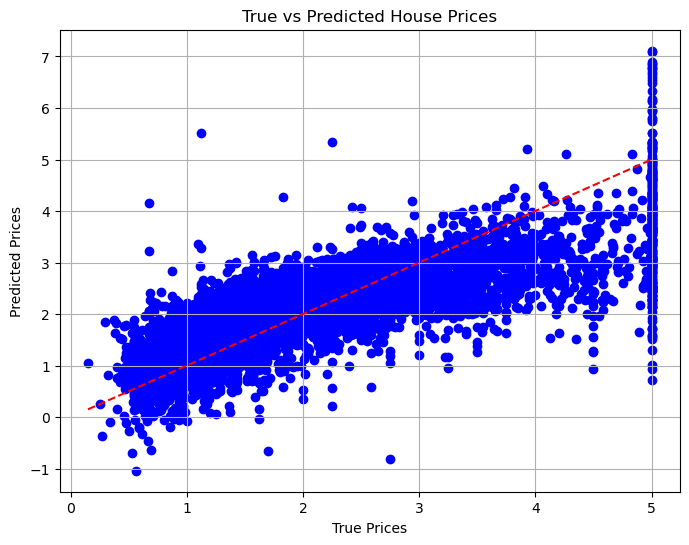

In [35]:
# Plot the predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices')
plt.grid(True)
plt.show()

In [38]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.52
Root Mean Squared Error (RMSE): 0.72
R² Score: 0.60


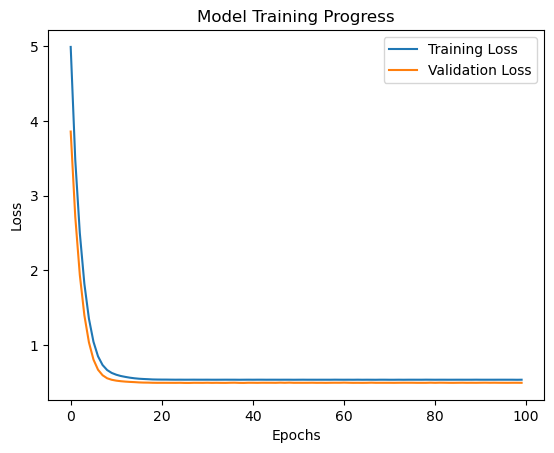

In [39]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Progress')
plt.show()